<a href="https://colab.research.google.com/github/SAI-KIRAN-954/Bharat_Intern_content_Management_tool_task_01-/blob/main/EDA_SAI1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#STEP-1 Importing Required libs

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#All required libs loaded successfully into i Python Note Book.

#STEP-2 Loading Required Dataset

In [90]:
df=pd.read_csv('/content/wine_quality.csv')

In [91]:
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Dataset loaded successfully, the above list of variables displayed...!!

#Step-3: Find the shape of the dataset.

In [92]:
print(df.shape)

(1599, 12)


Dataset contains total number rows 1599 and columns 12

#STEP-4: Get the information about dataset
#Understand Data Types and Missing Values

In [93]:
print(df.info())
print("-------------------------------------------")
print(df.dtypes)#data type of the columns in df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
-------------------------------------------
fixed acidity           float64
volatile acidity        float64
citric acid  

Displayed complete information related to dataset, number of cloumns and data types..!!

#STEP-5 Data Cleaning Process
#Check for Duplicates and Missing Values

In [94]:
print(df.duplicated().value_counts())
print("Number of duplicate rows:", df.duplicated().sum())

False    1359
True      240
Name: count, dtype: int64
Number of duplicate rows: 240


In the above we found 240 duplicated rows, try to drop all these for better analysis and results..!!

In [95]:
dff=df.drop_duplicates()# to drop all duplicate rows
dff.duplicated().value_counts()# to display list of unique rows count

,count
False,1359


Dataset does't have any duplicate rows

In [96]:
#Check for Missing Values:
print("Missing values:\n", dff.isnull().sum())
#Fill with Mean/Median (for numerical columns):
#dff['column_name'].fillna(dff['column_name'].mean(), inplace=True)
#Drop Rows with Missing Values (if they’re few and not crucial):
dff.dropna(inplace=True)

Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


<ipython-input-96-2f4b57cfc865>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff.dropna(inplace=True)


#Descriptive Statistics

#STEP-6: Apply basic stat on dataset
View summary statistics for numerical columns to understand central tendencies and spread.

In [97]:
#dff.describe() #Display all dispersions related Stat computations
# Summary statistics
print("Summary statistics:")
print(dff.describe().T)#transposes
print("----------------------------------------------------------------------")
dff.describe()


Summary statistics:
                       count       mean        std      min      25%      50%  \
fixed acidity         1359.0   8.310596   1.736990  4.60000   7.1000   7.9000   
volatile acidity      1359.0   0.529478   0.183031  0.12000   0.3900   0.5200   
citric acid           1359.0   0.272333   0.195537  0.00000   0.0900   0.2600   
residual sugar        1359.0   2.523400   1.352314  0.90000   1.9000   2.2000   
chlorides             1359.0   0.088124   0.049377  0.01200   0.0700   0.0790   
free sulfur dioxide   1359.0  15.893304  10.447270  1.00000   7.0000  14.0000   
total sulfur dioxide  1359.0  46.825975  33.408946  6.00000  22.0000  38.0000   
density               1359.0   0.996709   0.001869  0.99007   0.9956   0.9967   
pH                    1359.0   3.309787   0.155036  2.74000   3.2100   3.3100   
sulphates             1359.0   0.658705   0.170667  0.33000   0.5500   0.6200   
alcohol               1359.0  10.432315   1.082065  8.40000   9.5000  10.2000   
quality 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


The above result give clear pic on basic stat like mean median mode variance SD Q1, Q2, Q3 etc.....!!!

#STEP-7 Rename the columns(It is an optional step)

In [98]:
dff.columns   # it will only column names
# now i want to replace the column names containing - to _
dff.columns=dff.columns.str.replace(" ","_")#replace("Old", "New")
dff.columns# Display list of columns with newly renamed variables (Columns)

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#Conclusion: Once renamed req attributes from the dataset, need to remember new

names for EDA process..!!

<ipython-input-99-26a8fdbfce89>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=dff, palette='rainbow')


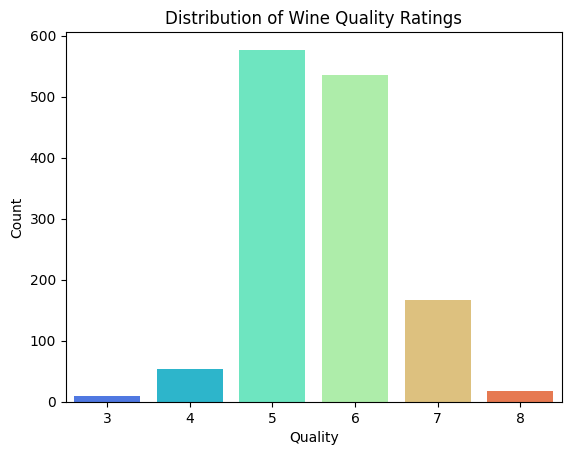

In [99]:
#Univariate Analysis
#This step examines each variable on its own to understand its distribution
#Target Variable Analysis (quality):
#Use a count plot to visualize the distribution of wine quality ratings.
#countplot  is used to display the frequency distribution of a categorical variable
sns.countplot(x='quality', data=dff, palette='rainbow')
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

#Insights:
Class Distribution:
You can identify which wine quality ratings are the most common (e.g., 5 and 6 may dominate).
Rare wine qualities (e.g., 3 or 8) can be spotted with shorter bars.
Balanced vs. Imbalanced Data:

A balanced dataset would have roughly equal counts for all quality ratings.
If the dataset is imbalanced (e.g., quality 6 has far more samples than others), special techniques like resampling may be needed to ensure the model doesn't favor the majority class.

#What the Plot Shows
X-Axis (quality):
Displays the unique wine quality ratings (e.g., 3, 4, 5, 6, 7, 8).
These are the categorical values in the quality column.

Y-Axis (Count):
Represents the number of samples (observations) for each quality rating.
Bars:

Each bar represents the frequency of a specific wine quality rating.
The height of the bar corresponds to the number of occurrences of that rating in the dataset.

#Feature Distributions:
#Plot histograms to see the distributions of other features.

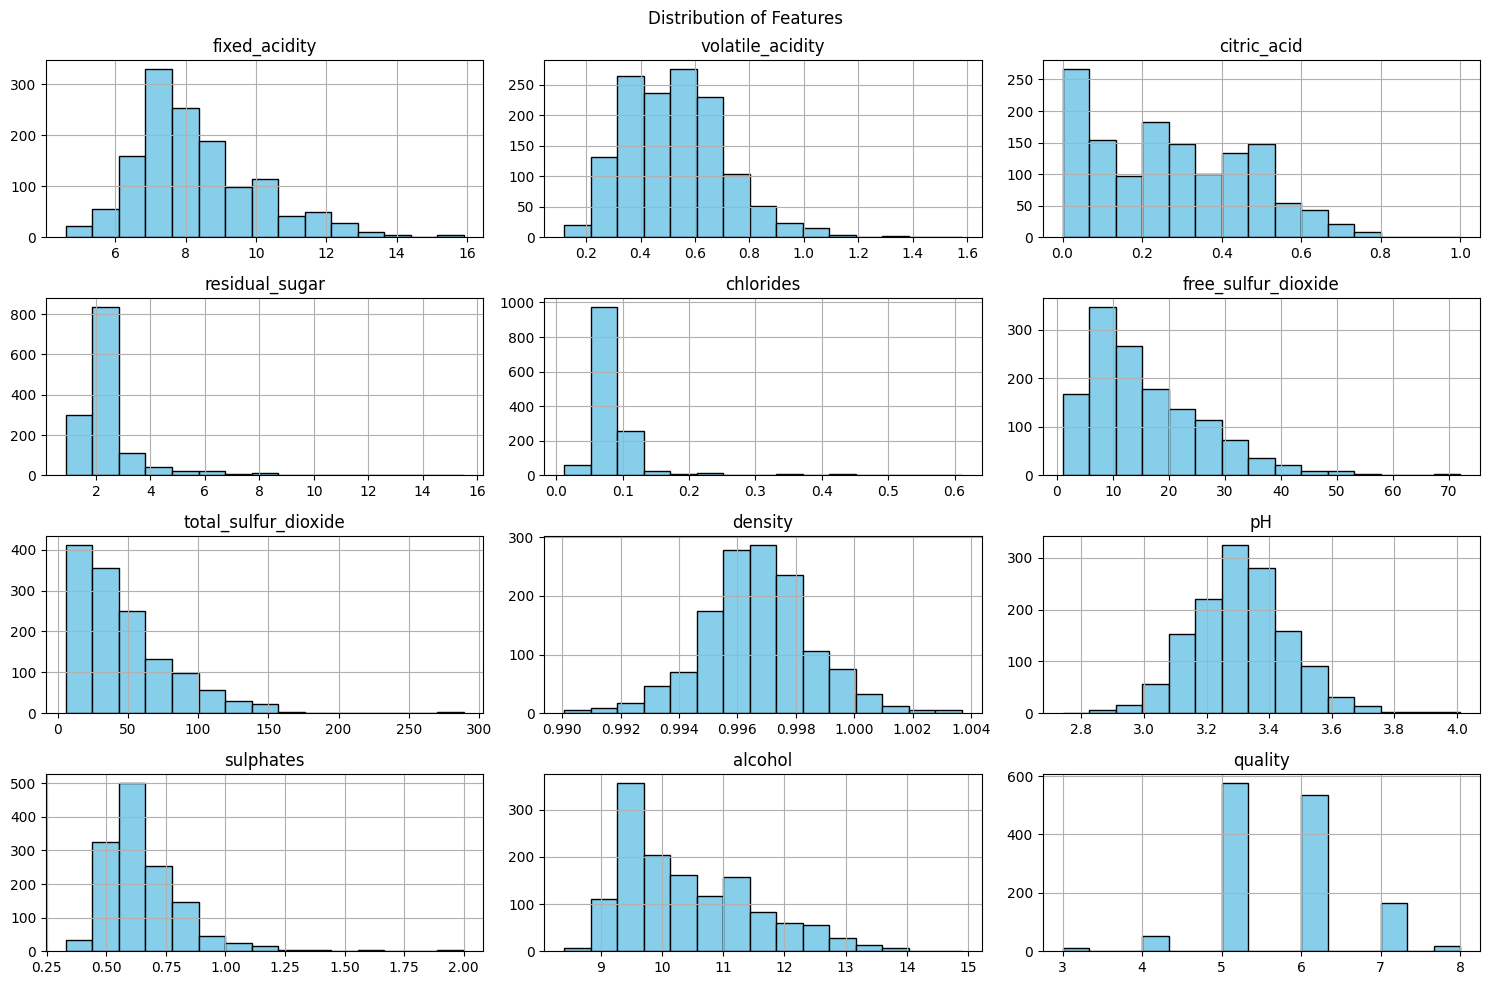

In [100]:
dff.hist(bins=15, figsize=(15,10), color="skyblue", edgecolor="Black")
plt.suptitle("Distribution of Features")
plt.tight_layout()
plt.show()

#Insights: histograms for all numerical features in a dataset to visualize their distributions.

Output and Interpretation
Each Plot:
Each numerical feature in the dataset will have its own histogram.
The x-axis represents the values of the feature.
The y-axis represents the count (frequency) of those values in the dataset.

Key Insights from Histograms:
Skewness:
If most values are concentrated on the left or right side, the feature is skewed.
Example: Alcohol content in wine might be positively skewed (many low values, fewer high values).

Outliers:
Check for bars far apart from the majority, indicating potential outliers.

Normal Distribution:
Features with bell-shaped curves are normally distributed.

Range:
Identify the range of each feature (e.g., pH values between 2.8–4.0).


Why Use Histograms in EDA?
Initial Understanding:
Histograms provide a quick overview of the data distribution for each feature.

Feature Engineering:
Features with extreme skewness may require transformations (e.g., log transformation).

Outlier Detection:
Extreme values can affect machine learning models and may need handling.

Scaling Decisions:
If features vary widely in range (e.g., citric acid vs. alcohol), scaling (standardization or normalization) is necessary.

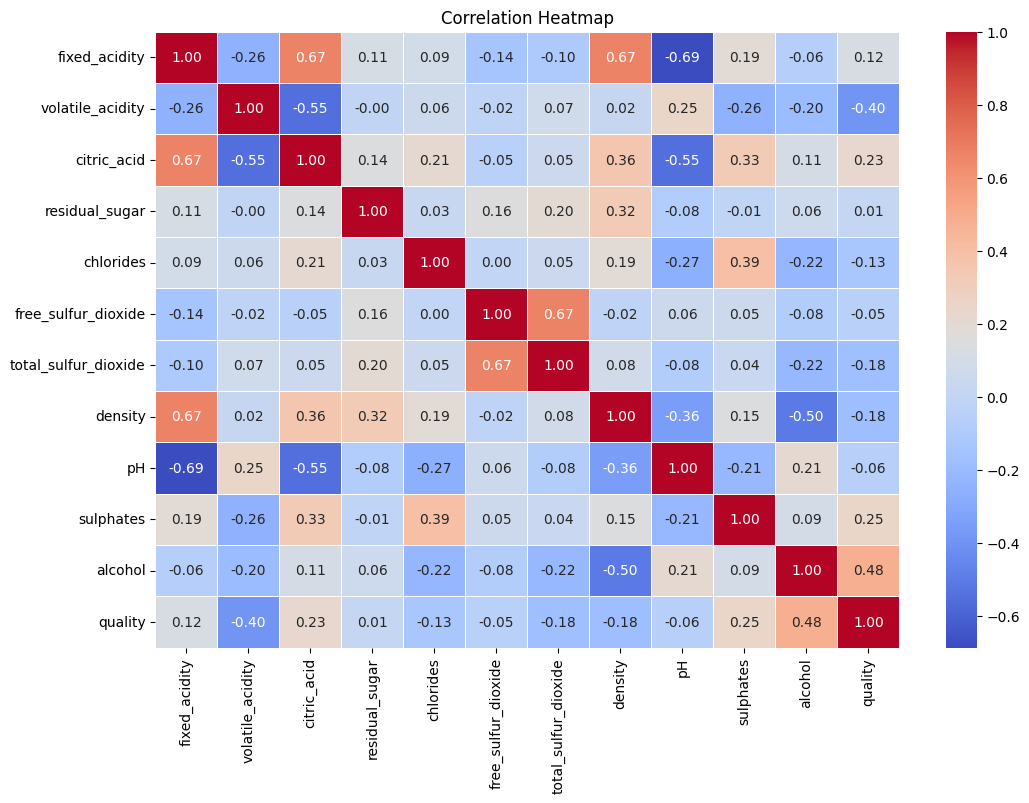

In [101]:
#Bivariate Analysis (Exploring Relationships Between Variables)
#This step explores relationships between variables to understand how features interact.
#Correlation Matrix:
#View correlations to understand relationships between quality and other features.
correlation_matrix=dff.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#Insights:
Output and Insights
Output (Heatmap)
The heatmap displays:
Heatmaps are particularly useful for datasets with many numerical features.
Diagonal cells: Always 1.0 (self-correlation of a variable).
Off-diagonal cells: Correlations between different variables.

Insights from the Heatmap
Strong Correlations:
Look for cells with values close to 1.0 or -1.0 (dark red or dark blue).
Example: If alcohol has a high positive correlation with quality, it might be an important predictor.

Weak Correlations:
Cells with values near 0.0 indicate weak or no correlation.
Features with low correlation to the target variable may not contribute much to prediction.

Multicollinearity:
High correlations (e.g., > 0.8) between independent variables (features) may indicate multicollinearity.
Example: If total sulfur dioxide and free sulfur dioxide are highly correlated, it could affect model performance.

Feature Selection:
Features with strong correlations to the target (quality) are potential candidates for predictive modeling.

Why Use a Correlation Matrix in EDA?
Feature Selection:
Focus on variables strongly correlated with the target variable.
Remove irrelevant features with near-zero correlation.

Detect Multicollinearity:
Identify pairs of features with high correlation to avoid redundancy in machine learning models.

Data Transformation:
If strong negative correlations are found, transformations (e.g., inverse scaling) might be necessary.

Model Insights:
Helps in building better models and understanding relationships between variables.

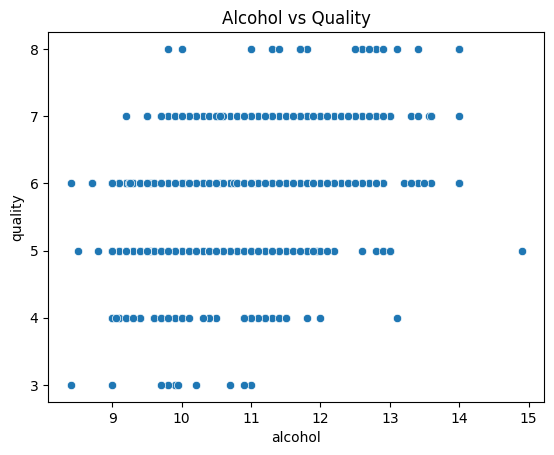

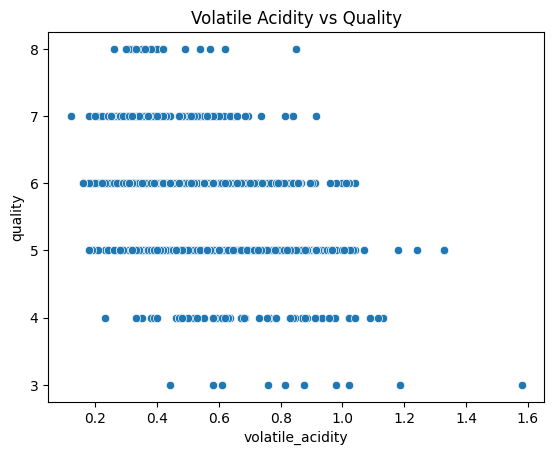

In [102]:
#Scatter Plot for Key Relationships:
#Plot scatter plots for features that have high correlations with quality (e.g., alcohol, volatile acidity).
sns.scatterplot(x='alcohol', y='quality', data=dff)
plt.title('Alcohol vs Quality')
plt.show()

sns.scatterplot(x='volatile_acidity', y='quality', data=dff)
plt.title('Volatile Acidity vs Quality')
plt.show()

#Insights:
Purpose of the Code
Scatter plots are used to visualize the relationship between two numerical variables.
In this case, we aim to:
Understand how alcohol is related to quality.
Understand how volatile acidity is related to quality.
Identify patterns, trends, or outliers in the relationships.

Interpreting the Plots
1. Alcohol vs. Quality
Expected Trends:
Wines with higher alcohol content often tend to have better quality ratings.
The points may show an upward trend: as alcohol increases, quality increases.
Insights:
A strong positive correlation might indicate that alcohol is a key feature for predicting quality.
Outliers, if present, can indicate wines with high alcohol but unexpectedly low quality, or vice versa.
2. Volatile Acidity vs. Quality
Expected Trends:
Wines with higher volatile acidity often have lower quality ratings.
The points may show a downward trend: as volatile acidity increases, quality decreases.
Insights:
A strong negative correlation might indicate that high acidity negatively impacts wine quality.
Outliers may represent wines with unusual acidity levels that still have high or low quality ratings.

Usefulness of Scatter Plots in EDA
Relationship Analysis:
Scatter plots visually show the relationship (linear, non-linear, or no relationship) between two variables.
These relationships can guide feature selection for predictive modeling.

Identifying Correlation:
You can often detect trends that align with correlation metrics (e.g., strong positive/negative trends).

Detecting Outliers:
Points that deviate significantly from the general trend might indicate outliers in the data.

Feature Importance:
Features with clear patterns related to the target variable (quality) are strong candidates for machine learning models.

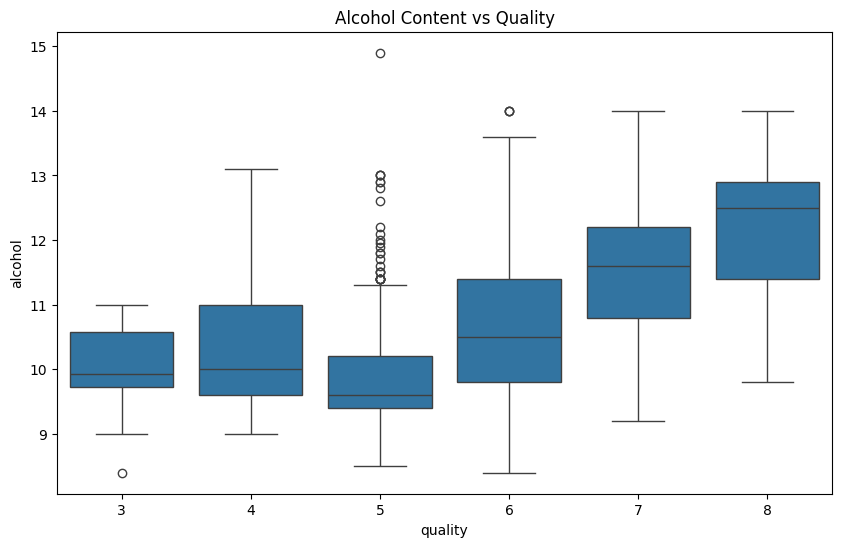

In [103]:
#Box Plot for Categorical Analysis:
#Compare the distribution of alcohol for different quality levels to see if higher alcohol content corresponds to higher quality.
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=dff)
plt.title('Alcohol Content vs Quality')
plt.show()

#Insights:
Insights You Can Derive
Median Alcohol Content by Quality:
Higher-quality wines might show higher median alcohol content, indicating a potential positive relationship between alcohol and wine quality.

Spread of Alcohol Content:
A wide spread indicates variability in alcohol content for wines of that quality.
A narrow spread suggests consistency in alcohol levels.

Outliers:
Unusual wines with extremely low or high alcohol content for a given quality rating can be identified.

Trends:
Observe if there’s a clear upward or downward trend in alcohol content as quality increases.

Why Use Box Plots in EDA?
Compare Groups:
Box plots are excellent for comparing numerical data distributions across categories.
Detect Outliers:
Identify unusual values that might need special attention during data cleaning.
Understand Variability:
Provides insights into the spread and consistency of data within each group.
Guide Feature Selection:
Strong differences in distributions between groups may indicate a useful predictive feature for machine learning.

Real-World Applications
If the box plot shows a clear trend between alcohol content and quality, it confirms alcohol as an important feature for predicting wine quality.
This analysis can guide decisions in feature engineering or business strategies (e.g., marketing higher-alcohol wines as higher quality).
Box plots are simple yet powerful tools for exploring relationships between categorical and numerical variables in data science workflows!

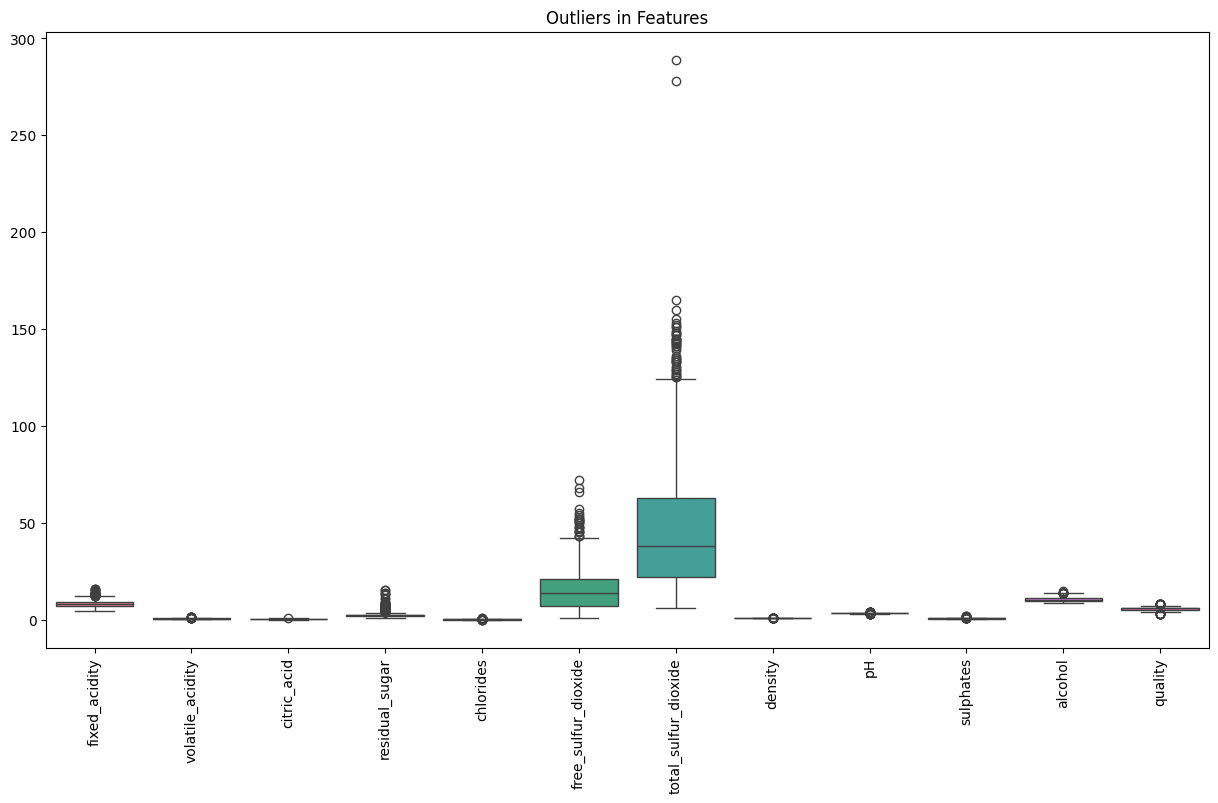

In [104]:
#Outlier Detection and Treatment
#Box Plot Analysis for Outliers:
#Use box plots to see if any features have extreme values.
plt.figure(figsize=(15, 8))
sns.boxplot(data=dff)
plt.xticks(rotation=90)
plt.title("Outliers in Features")
plt.show()

Purpose of the Code
Visualizing Outliers:
Box plots are used to detect outliers (values that fall significantly outside the expected range for a feature).
This plot shows the distribution and variability of each numerical feature.

EDA Goal:
Identify which features have outliers.
Understand the spread and central tendency of each feature.
Use this information to decide on potential data preprocessing steps like outlier treatment or feature scaling.

Understanding the Output
Each Box Plot
Represents the distribution of values for one numerical feature.
Key Components:
Median (Line inside the box):
The middle value of the data for that feature.
Interquartile Range (Box):
Spans from the 25th percentile (Q1) to the 75th percentile (Q3), covering the middle 50% of the data.
Whiskers:
Extend to the data points within 1.5 times the IQR from Q1 and Q3.
Outliers (Dots outside whiskers):
Points that fall outside the whiskers and represent extreme values.


What to Look For
Outliers:
Features with dots far outside the whiskers have outliers.
Example: volatile acidity or total sulfur dioxide might show significant outliers.

Feature Spread:
Wide boxes indicate high variability, while narrow boxes show low variability.

Symmetry:
Symmetrical boxes suggest normally distributed data.
Skewed distributions can be seen if the box is pushed toward one end.

Feature Comparisons:
Differences in range, spread, and presence of outliers between features can guide preprocessing.

In [105]:
#Handle Outliers Using the IQR Method:
#Use the IQR method to cap or remove extreme values.
Q1 = dff.quantile(0.25)
Q3 = dff.quantile(0.75)
IQR = Q3 - Q1
data_no_outliers = dff[~((dff < (Q1 - 1.5 * IQR)) | (dff > (Q3 + 1.5 * IQR))).any(axis=1)]

#Insights: Outliers might distort analysis. For example, extremely high values for residual sugar could be capped.

In [106]:
#Feature Engineering
#Transform Skewed Features:
#Log-transform skewed features if needed.
dff['log_alcohol'] = np.log(dff['alcohol'] + 1)

<ipython-input-106-81f6f89b6def>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['log_alcohol'] = np.log(dff['alcohol'] + 1)


In [107]:
#Feature Scaling:
#Scale features to bring them to a similar range, especially if you plan to use models like K-Nearest Neighbors.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dff.drop(columns=['quality']))
data_scaled = pd.DataFrame(data_scaled, columns=dff.columns[:-1])


In [108]:
#Encoding Quality as a Binary Classification:
#Optionally, create a binary classification if your model only supports binary targets.
dff['quality_binary'] = dff['quality'].apply(lambda x: 1 if x >= 6 else 0)
dff['quality_binary']

<ipython-input-108-3c4b6ba299ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['quality_binary'] = dff['quality'].apply(lambda x: 1 if x >= 6 else 0)


,quality_binary
0,0
1,0
2,0
3,1
5,0
...,...
1593,1
1594,0
1595,1
1597,0


#Summarize Insights and Prepare for Modeling
-Summarize the findings and prepare your -data for modeling. For example:
-Summary of Key Findings:
-Features like alcohol and sulphates -positively correlate with quality.
-Some features, such as density and volatile -acidity, show negative correlations with -quality.
-Outliers were found in features like -residual sugar, which were handled using -IQR.

In [109]:
#Final Data Preparation:
#Separate features (X) and target (y) for modeling.
X = dff.drop(columns=['quality', 'quality_binary'])  # use original `quality` or `quality_binary`
y = dff['quality']  # or `y = dff['quality_binary']`

In [110]:
processed_data = pd.concat([X, y], axis=1)
processed_data.to_csv("processed_winequality-red.csv", index=False)

In [111]:
#Splitting Data into Train and Test Sets:
#Train-Test Split: Before any model training, split your data into training and
#testing sets (usually 70-80% for training, 20-30% for testing). Use train_test_split from Scikit-Learn for this.
from sklearn.model_selection import train_test_split
X = dff.drop(columns=['quality'])
y = dff['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [112]:
X_test

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,log_alcohol,quality_binary
55,7.7,0.620,0.04,3.8,0.084,25.0,45.0,0.99780,3.34,0.53,9.5,2.351375,0
1291,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9,2.476538,1
1544,8.4,0.370,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,2.501436,1
593,9.9,0.490,0.58,3.5,0.094,9.0,43.0,1.00040,3.29,0.58,9.0,2.302585,0
1261,6.3,1.020,0.00,2.0,0.083,17.0,24.0,0.99437,3.59,0.55,11.2,2.501436,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,8.5,0.340,0.40,4.7,0.055,3.0,9.0,0.99738,3.38,0.66,11.6,2.533697,1
662,7.2,0.570,0.06,1.6,0.076,9.0,27.0,0.99720,3.36,0.70,9.6,2.360854,1
279,8.9,0.400,0.32,5.6,0.087,10.0,47.0,0.99910,3.38,0.77,10.5,2.442347,1
1111,5.4,0.420,0.27,2.0,0.092,23.0,55.0,0.99471,3.78,0.64,12.3,2.587764,1


In [113]:
X_train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,log_alcohol,quality_binary
1016,8.9,0.38,0.40,2.2,0.068,12.0,28.0,0.99486,3.27,0.75,12.6,2.610070,1
1519,6.6,0.70,0.08,2.6,0.106,14.0,27.0,0.99665,3.44,0.58,10.2,2.415914,0
452,6.8,0.56,0.03,1.7,0.084,18.0,35.0,0.99680,3.44,0.63,10.0,2.397895,1
847,7.4,0.68,0.16,1.8,0.078,12.0,39.0,0.99770,3.50,0.70,9.9,2.388763,1
58,7.8,0.59,0.18,2.3,0.076,17.0,54.0,0.99750,3.43,0.59,10.0,2.397895,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,11.3,0.37,0.50,1.8,0.090,20.0,47.0,0.99734,3.15,0.57,10.5,2.442347,0
1329,7.4,0.60,0.26,2.1,0.083,17.0,91.0,0.99616,3.29,0.56,9.8,2.379546,1
1526,6.8,0.47,0.08,2.2,0.064,18.0,38.0,0.99553,3.30,0.65,9.6,2.360854,1
1011,8.9,0.32,0.31,2.0,0.088,12.0,19.0,0.99570,3.17,0.55,10.4,2.433613,1
